In [1]:
%load_ext autoreload
%autoreload 2
import sklearn
from sklearn.datasets import load_wine, load_iris
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

from isometry_pursuit.experiment import run_resampling_experiment
from isometry_pursuit.plot import box_plot
from isometry_pursuit.transformation import exponential_transformation
from isometry_pursuit.algorithm import greedy, brute, group_basis_pursuit
from isometry_pursuit.loss import isometry_loss, group_lasso_norm


import random

np.random.seed(1234)
random.seed(1234)

In [2]:
# Simulation setup
np.random.seed(42)
D = 2  # Dimension constraint for selection
n_features = 4
power = 1

# Generate a random design matrix X
theta1 = 5*np.pi / 6
theta2 = np.pi/4
theta3 = 7*np.pi/4
X = np.asarray([[1,0],
                [np.cos(theta1),np.sin(theta1)],
                [np.cos(theta2), np.sin(theta2)],
                [np.cos(theta3), np.sin(theta3)]]).transpose()
X = np.hstack([np.hstack([X[:,:2]]*1), X[:,2:]])

# Greedy algorithm
for i in range(10):
    output_indices = greedy(X, lambda x: isometry_loss(x, power), random_state=i)
    greedy_loss = isometry_loss(X[:, output_indices], power)
    print(greedy_loss)

greedy None
greedy [2]
greedy [2, 3]
2.0
greedy None
greedy [2]
greedy [2, 3]
2.0
greedy None
greedy [2]
greedy [2, 3]
2.0
greedy None
greedy [2]
greedy [2, 3]
2.0
greedy None
greedy [3]
greedy [3, 2]
2.0
greedy None
greedy [0]
greedy [0, 3]
2.558028427462196
greedy None
greedy [0]
greedy [0, 3]
2.558028427462196
greedy None
greedy [0]
greedy [0, 3]
2.558028427462196
greedy None
greedy [1]
greedy [1, 2]
2.0360995061397937
greedy None
greedy [2]
greedy [2, 3]
2.0


In [3]:
beta = group_basis_pursuit(X)

/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


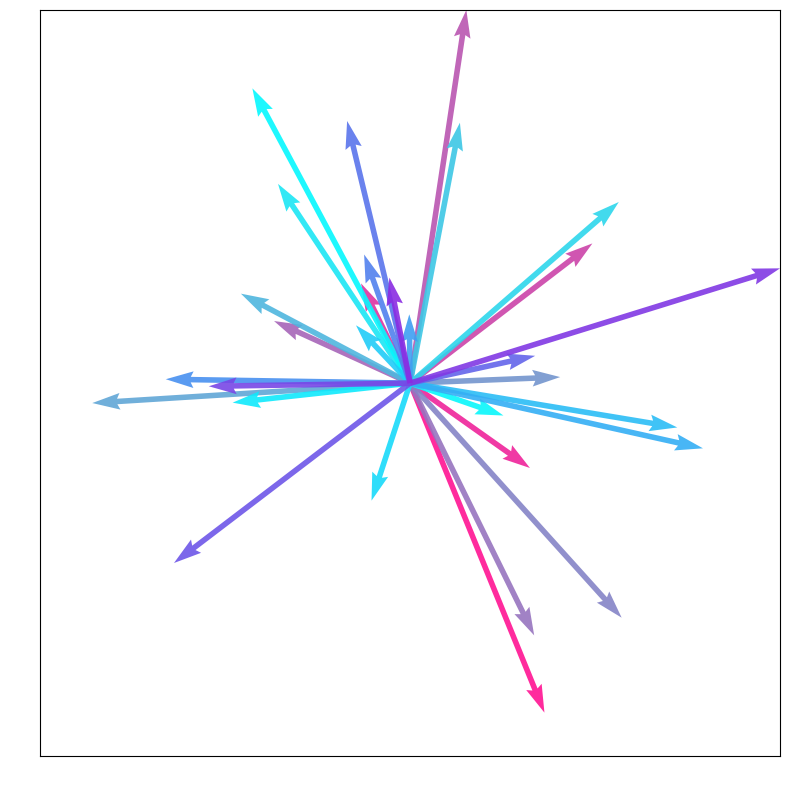

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Set the number of vectors
num_vectors = 30

# All vectors start at the origin
start_x = np.zeros(num_vectors)
start_y = np.zeros(num_vectors)

# Generate random directions and magnitudes for the vectors
angles = np.random.uniform(0, 2 * np.pi, num_vectors)  # Random angles
magnitudes = np.random.uniform(0.5, 3, num_vectors)    # Random lengths
end_x = magnitudes * np.cos(angles)                    # X components
end_y = magnitudes * np.sin(angles)                    # Y components

# Define a bright Miami-inspired color gradient
miami_cmap = LinearSegmentedColormap.from_list("MiamiPalette", ["#FF1493", "#00FFFF", "#8A2BE2"])  # Hot pink, cyan, deep purple
colors = miami_cmap(np.linspace(0, 1, num_vectors))  # Generate colors based on the number of vectors

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot each vector
for i in range(num_vectors):
    plt.quiver(
        start_x[i], start_y[i],      # Starting point (all at origin)
        end_x[i], end_y[i],          # Vector direction
        angles='xy', scale_units='xy', scale=1, # Keep vectors at correct scale
        color=colors[i],             # Use continuous Miami-inspired colors
        alpha=0.9                    # Make colors pop
    )

# Add a stylish title and axis labels
# plt.xlabel("Meaningless Coordinate 1", fontsize=20, color="black")
# plt.ylabel("Meaningless Coordinate 2", fontsize=20, color="black")

# Set axis limits and remove gridlines
xlim = max([np.abs(end_x.min()), end_x.max()])
ylim = max([np.abs(end_y.min()), end_y.max()])
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
# plt.gca().set_facecolor("#222222")  # Dark background for contrast
# plt.gca().spines['bottom'].set_color('white')
# plt.gca().spines['left'].set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')


# Display the plot
# plt.show()
plt.tight_layout()
plt.savefig('/Users/samsonkoelle/isometry-pursuit/figures/interpretabledirections3.png')

In [7]:
import matplotlib.patches as mpatches


In [8]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import LinearSegmentedColormap

# np.random.seed(2)
# # Set the number of vectors
# num_vectors = 30

# # All vectors start at the origin
# start_x = np.zeros(num_vectors)
# start_y = np.zeros(num_vectors)

# # Generate random directions and magnitudes for the vectors
# angles = np.random.uniform(0, 2 * np.pi, num_vectors)  # Random angles
# # magnitudes = np.random.normal(0.5, 1.5, num_vectors)    # Random lengths
# magnitudes = np.exp(np.random.uniform(np.log(0.5), np.log(2), num_vectors))

# end_x = magnitudes * np.cos(angles)                    # X components
# end_y = magnitudes * np.sin(angles)                    # Y components

# # Add two vectors at right angles to each other
# theta = np.pi / 3
# end_x = np.append(end_x, [np.cos(theta), np.cos(theta + np.pi/2)])  # One along the x-axis
# end_y = np.append(end_y, [np.sin(theta), np.sin(theta + np.pi/2)])  # One along the y-axis
# start_x = np.append(start_x, [0, 0])
# start_y = np.append(start_y, [0, 0])

# xlim = max([np.abs(end_x.min()), end_x.max(), np.abs(end_y.min()), end_y.max()])
# ylim = xlim


# # Define a bright Miami-inspired color gradient
# miami_cmap = LinearSegmentedColormap.from_list("MiamiPalette", ["#FF1493", "#00FFFF", "#8A2BE2"])  # Hot pink, cyan, deep purple
# colors = miami_cmap(np.linspace(0, 1, len(end_x)))  # Generate colors based on the number of vectors

# # Create a figure
# fig, ax = plt.subplots(figsize=(8, 8))

# # Plot each vector
# for i in range(len(end_x)):
#     plt.quiver(
#         start_x[i], start_y[i],      # Starting point (all at origin)
#         end_x[i], end_y[i],          # Vector direction
#         angles='xy', scale_units='xy', scale=1, # Keep vectors at correct scale
#         color=colors[i],             # Use continuous Miami-inspired colors
#         alpha=0.9                    # Make colors pop
#     )

#     from matplotlib.lines import Line2D

# colorful_title(ax, "Interpretable features", colors)

# # Add a stylish title and axis labels
# plt.xlabel("Meaningless Coordinate 1", fontsize=20, color="black")
# plt.ylabel("Meaningless Coordinate 2", fontsize=20, color="black")

# # Set axis limits and remove gridlines
# plt.xlim(-xlim, xlim)
# plt.ylim(-ylim, ylim)
# # Add a custom arrow in the legend
# # Adding an arrow
# # Create a horizontal arrow legend entry
# # Create a dummy arrow for the legend
# arrow_for_legend = mpatches.FancyArrow(0, 0, 1, 0, color='black')
# from matplotlib.patches import FancyArrow
# # Add the legend with the custom handler
# plt.legend(handles=[arrow_for_legend], labels=[r"$\nabla g_p$"], fontsize = 20, frameon = False, handler_map={mpatches.FancyArrow: HandlerArrow()}, loc="upper left")

# # S
# # Display the plot
# plt.tight_layout()
# plt.savefig('/Users/samsonkoelle/isometry-pursuit/figures/interpretabledirections.png')


In [9]:
from matplotlib.legend_handler import HandlerPatch

# Custom legend handler for the arrow
class HandlerArrow(HandlerPatch):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        arrow = FancyArrow(0, 0.5*height, width, 0, 
                           length_includes_head=True, 
                           head_width=0.4*height, 
                           head_length=0.4*width, 
                           color=orig_handle.get_edgecolor(), 
                           linewidth=orig_handle.get_linewidth())
        arrow.set_transform(trans)
        return [arrow]


In [10]:
# Custom legend handler for a dotted circle
class HandlerDottedCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        # Create a small circle with a dotted edge
        circle = Circle(
            (width / 2, height / 2),  # Center of the circle
            radius=height / 3,       # Radius of the circle
            edgecolor='black',       # Edge color
            facecolor='none',        # No fill
            linestyle=':',           # Dotted line style
            linewidth=1.5
        )
        circle.set_transform(trans)
        return [circle]


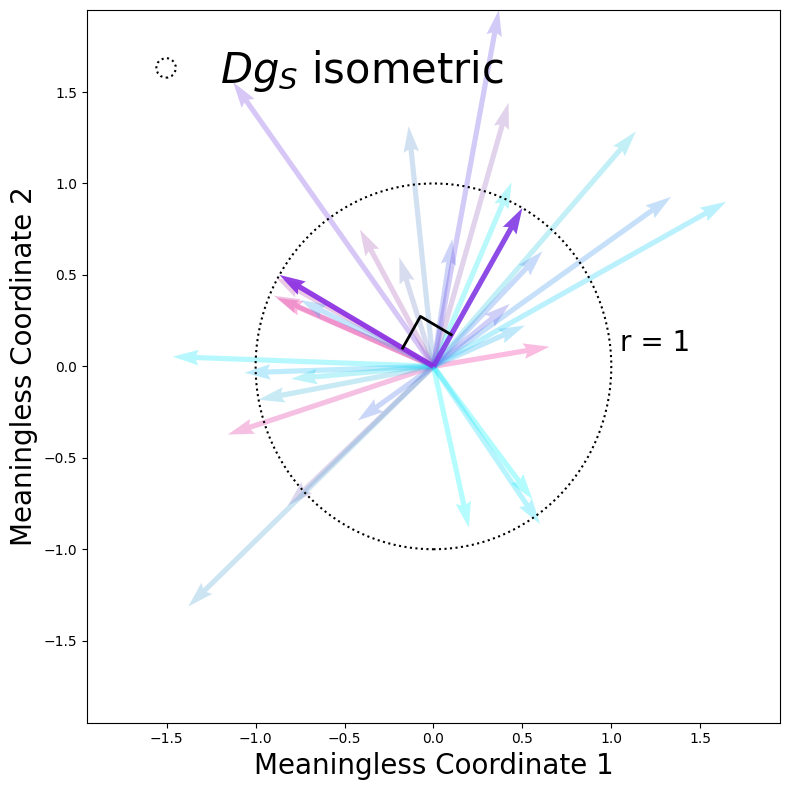

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

np.random.seed(2)
# Set the number of vectors
num_vectors = 30

# All vectors start at the origin
start_x = np.zeros(num_vectors)
start_y = np.zeros(num_vectors)

# Generate random directions and magnitudes for the vectors
angles = np.random.uniform(0, 2 * np.pi, num_vectors)  # Random angles
magnitudes = np.exp(np.random.uniform(np.log(0.5), np.log(2), num_vectors))

end_x = magnitudes * np.cos(angles)                    # X components
end_y = magnitudes * np.sin(angles)                    # Y components

# Add two vectors at right angles to each other
theta = np.pi / 3
x1, y1 = np.cos(theta), np.sin(theta)
x2, y2 = -y1, x1  # Perpendicular vector

end_x = np.append(end_x, [x1, x2])
end_y = np.append(end_y, [y1, y2])
start_x = np.append(start_x, [0, 0])
start_y = np.append(start_y, [0, 0])

xlim = max([np.abs(end_x.min()), end_x.max(), np.abs(end_y.min()), end_y.max()])
ylim = xlim

# Define a bright Miami-inspired color gradient
miami_cmap = LinearSegmentedColormap.from_list("MiamiPalette", ["#FF1493", "#00FFFF", "#8A2BE2"])  # Hot pink, cyan, deep purple
# colors = miami_cmap(np.linspace(0, 1, len(end_x) - 2))  # Generate colors for random vectors
# colors = np.vstack([colors, [[1, 0, 0, 1], [0, 0, 1, 1]]])  # Add red and blue for the right-angle vectors
colors = miami_cmap(np.linspace(0, 1, len(end_x)))  # Generate colors based on the number of vectors

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot random vectors with faint colors
for i in range(num_vectors):
    plt.quiver(
        start_x[i], start_y[i],      # Starting point (all at origin)
        end_x[i], end_y[i],          # Vector direction
        angles='xy', scale_units='xy', scale=1, # Keep vectors at correct scale
        color=[colors[i][0], colors[i][1], colors[i][2], 0.3],  # Make them faint
        alpha=0.3
    )

# Plot right-angle vectors with bold colors
for i in range(num_vectors, len(end_x)):
    plt.quiver(
        start_x[i], start_y[i],      # Starting point (all at origin)
        end_x[i], end_y[i],          # Vector direction
        angles='xy', scale_units='xy', scale=1, # Keep vectors at correct scale
        color=colors[i],             # Use prominent colors for right-angle vectors
        alpha=0.9
    )

# Add a right-angle symbol
symbol_scale = 0.2  # Scale for the right-angle symbol
corner_x = x1 * symbol_scale
corner_y = y1 * symbol_scale

symbol_x = [corner_x, corner_x + x2 * symbol_scale, x2 * symbol_scale]
symbol_y = [corner_y, corner_y + y2 * symbol_scale, y2 * symbol_scale]

plt.plot(symbol_x, symbol_y, color='black', linewidth=2)

# Add a dotted black circle with radius 1
circle = plt.Circle((0, 0), 1, color='black', linestyle='dotted', fill=False, linewidth=1.5)
ax.add_artist(circle)

# Add a small line and label "r = 1" on the x-axis
# ax.plot([1, 1], [0, 0.05], color='black', linewidth=1.5)  # Small vertical line at x=1
ax.text(1.05, 0.05, "r = 1", fontsize=20, color='black', ha='left', va='bottom')  # Label

# Add title and axis labels
plt.xlabel("Meaningless Coordinate 1", fontsize=20, color="black")
plt.ylabel("Meaningless Coordinate 2", fontsize=20, color="black")

# Set axis limits
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
# Create a dummy dotted circle for the legend
from matplotlib.patches import Circle
dotted_circle = Circle((0, 0), radius=1.2, edgecolor='black', facecolor='none')

# Add the legend with the custom handler
plt.legend(handles=[dotted_circle], fontsize = 30,frameon = False,labels=[r"$Dg_{S}$ isometric"], handler_map={Circle: HandlerDottedCircle()}, loc="upper left",    handletextpad=0.3,  # Adjusts the space between the symbol and text
    labelspacing=0.,   # Adjusts vertical space between legend entries
)

# Display the plot
plt.tight_layout()
plt.savefig('/Users/samsonkoelle/isometry-pursuit/figures/goldencompass.png')


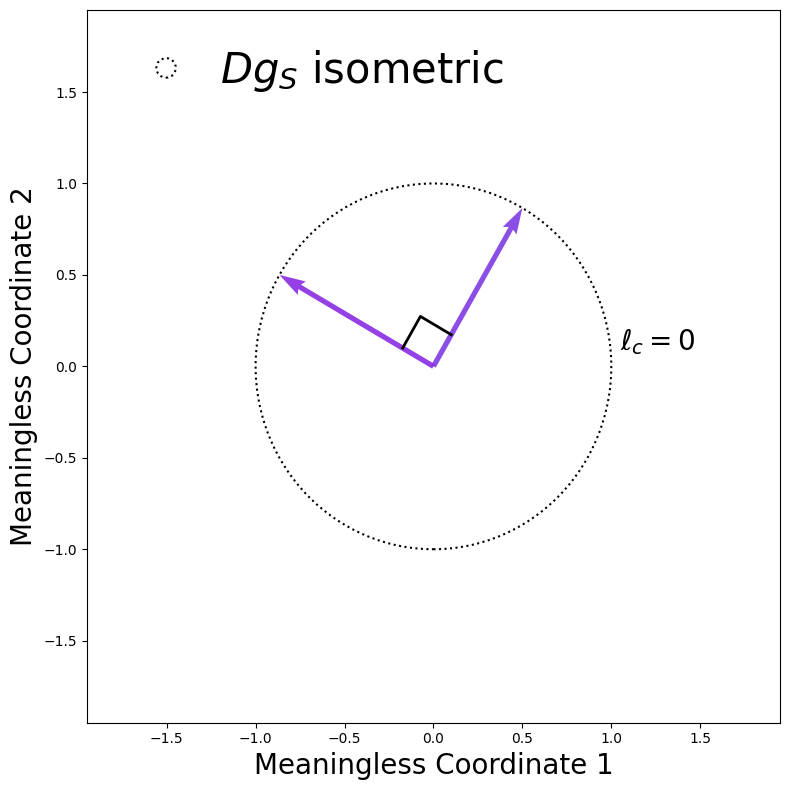

In [429]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch

# Custom handler for dotted circle
class HandlerDottedCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        circle = Circle(
            (width / 2, height / 2),
            radius=height / 3,
            edgecolor='black',
            facecolor='none',
            linestyle='dotted',
            linewidth=1.5,
        )
        circle.set_transform(trans)
        return [circle]

# Add two vectors at right angles to each other
theta = np.pi / 3
x1, y1 = np.cos(theta), np.sin(theta)
x2, y2 = -y1, x1  # Perpendicular vector

start_x = [0, 0]
start_y = [0, 0]
end_x = [x1, x2]
end_y = [y1, y2]


# Define a bright Miami-inspired color gradient
miami_cmap = LinearSegmentedColormap.from_list("MiamiPalette", ["#FF1493", "#00FFFF", "#8A2BE2"])  # Hot pink, cyan, deep purple
colors = miami_cmap(np.linspace(.96, 1, 2))  # Generate colors for vectors

# Create a figure
fig, ax = plt.subplots(figsize=(8, 8))

# Plot right-angle vectors with bold colors
for i in range(len(end_x)):
    ax.quiver(
        start_x[i], start_y[i],      # Starting point (all at origin)
        end_x[i], end_y[i],          # Vector direction
        angles='xy', scale_units='xy', scale=1, # Keep vectors at correct scale
        color=colors[i],             # Use prominent colors for right-angle vectors
        alpha=0.9
    )

# Add a right-angle symbol
symbol_scale = 0.2  # Scale for the right-angle symbol
corner_x = x1 * symbol_scale
corner_y = y1 * symbol_scale

symbol_x = [corner_x, corner_x + x2 * symbol_scale, x2 * symbol_scale]
symbol_y = [corner_y, corner_y + y2 * symbol_scale, y2 * symbol_scale]

ax.plot(symbol_x, symbol_y, color='black', linewidth=2)

# Add a dotted black circle with radius 1
circle = plt.Circle((0, 0), 1, color='black', linestyle='dotted', fill=False, linewidth=1.5)
ax.add_artist(circle)

# Add a small line and label "l_c = 2" on the x-axis
ax.text(1.05, 0.05, r"$\ell_c = 0$", fontsize=20, color='black', ha='left', va='bottom')  # Label

# Add title and axis labels
ax.set_xlabel("Meaningless Coordinate 1", fontsize=20, color="black")
ax.set_ylabel("Meaningless Coordinate 2", fontsize=20, color="black")

# Set axis limits
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)

# Create a dummy dotted circle for the legend
dotted_circle = Circle((0, 0), radius=1.2, edgecolor='black', facecolor='none')

# Add the legend with the custom handler
ax.legend(
    handles=[dotted_circle],
    fontsize=30,
    frameon=False,
    labels=[r"$Dg_{S}$ isometric"],
    handler_map={Circle: HandlerDottedCircle()},
    loc="upper left",
    handletextpad=0.3,  # Adjusts the space between the symbol and text
    labelspacing=0.0,   # Adjusts vertical space between legend entries
)

# Display the plot
fig.tight_layout()
plt.savefig('/Users/samsonkoelle/isometry-pursuit/figures/isometree.png')


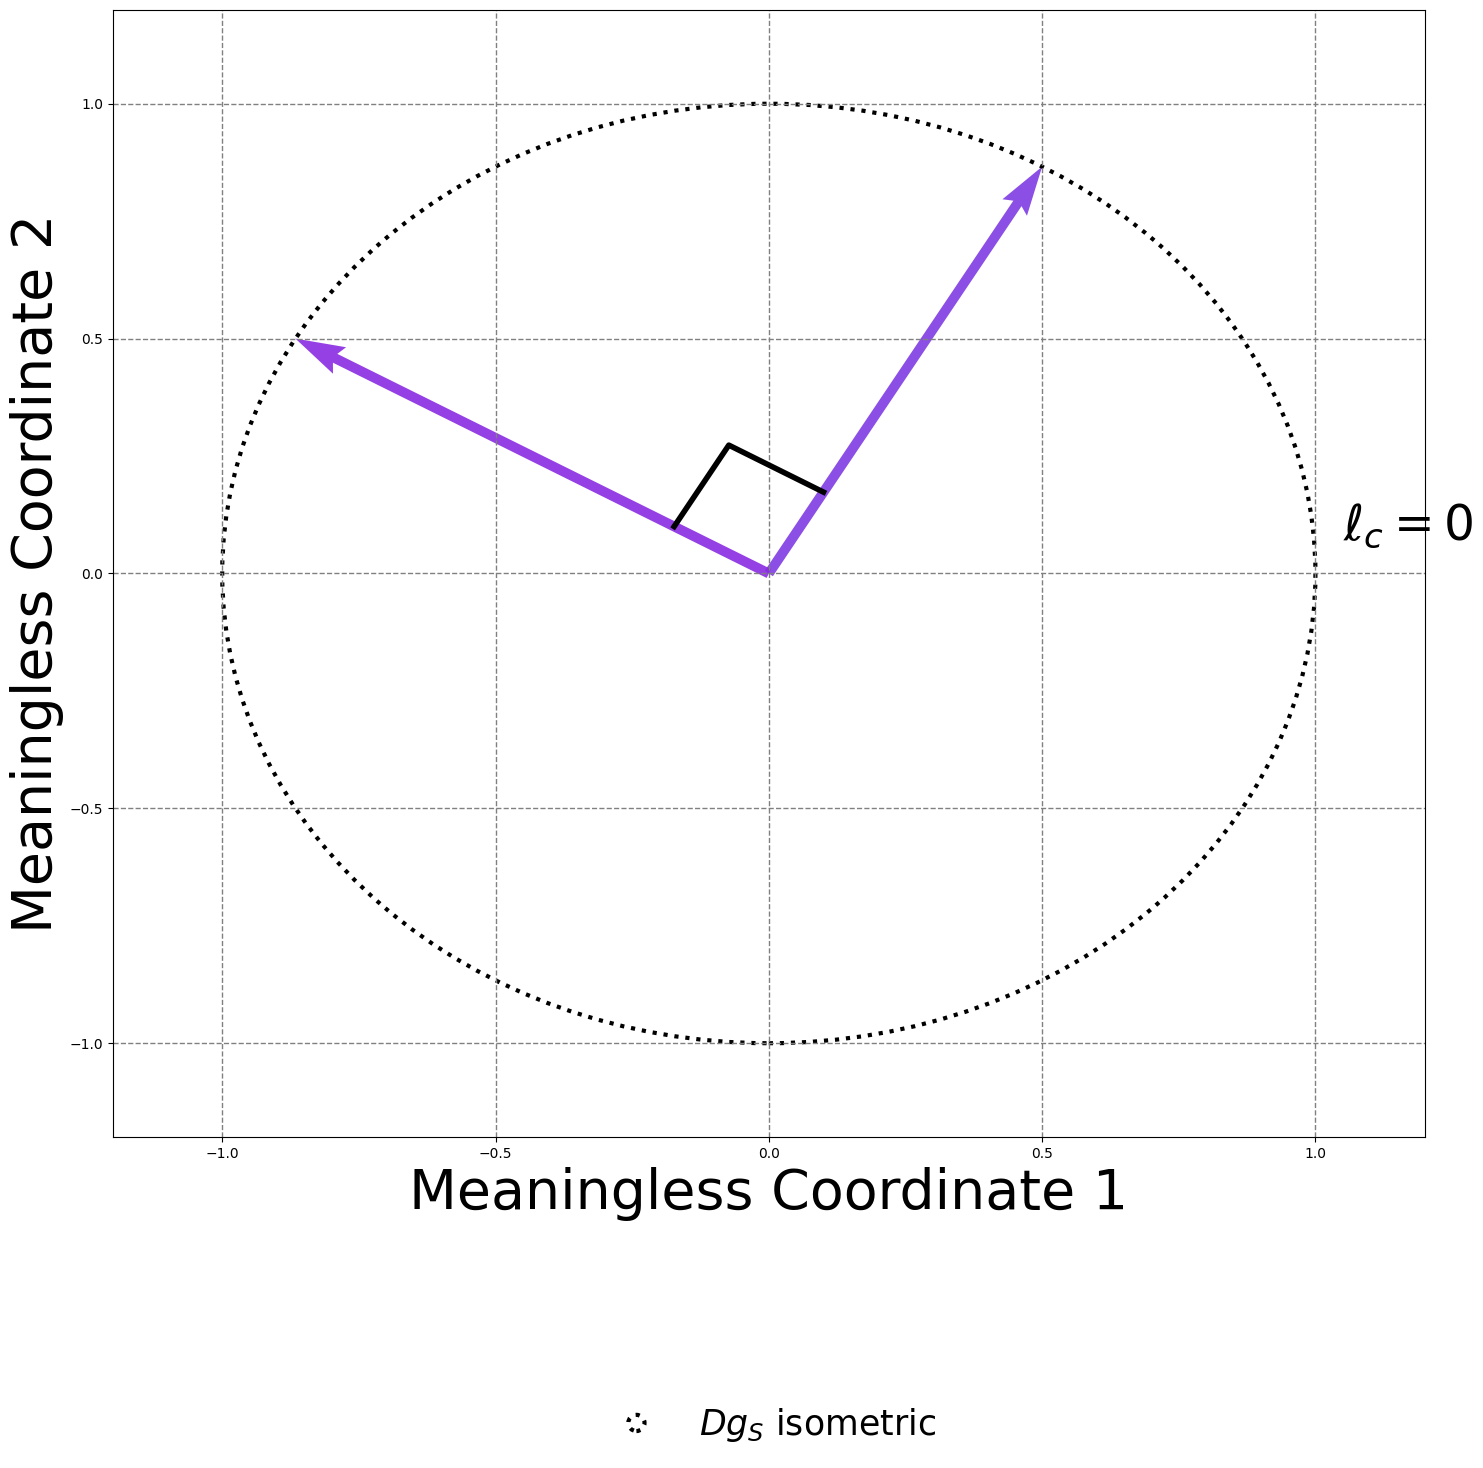

In [440]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch

# Custom handler for dotted circle
class HandlerDottedCircle(HandlerPatch):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        circle = Circle(
            (width / 2, height / 2),
            radius=height / 3,
            edgecolor='black',
            facecolor='none',
            linestyle='dotted',
            linewidth=3,
        )
        circle.set_transform(trans)
        return [circle]

# Right-angle vectors
theta = np.pi / 3
x1, y1 = np.cos(theta), np.sin(theta)
x2, y2 = -y1, x1  # Perpendicular vector

start_x = [0, 0]
start_y = [0, 0]
end_x = [x1, x2]
end_y = [y1, y2]

# Define a Miami-inspired color gradient
miami_cmap = LinearSegmentedColormap.from_list("MiamiPalette", ["#FF1493", "#00FFFF", "#8A2BE2"])
colors = miami_cmap(np.linspace(0.96, 1, 2))

# Create figure and axis for vector plot
fig, ax = plt.subplots(figsize=(15,15))  # Increased figure size

# Plot vectors
for i in range(len(end_x)):
    ax.quiver(
        start_x[i], start_y[i], end_x[i], end_y[i],
        angles='xy', scale_units='xy', scale=1,
        color=colors[i], alpha=0.9, linewidth=6
    )

# Add right-angle symbol
symbol_scale = 0.2
corner_x, corner_y = x1 * symbol_scale, y1 * symbol_scale
symbol_x = [corner_x, corner_x + x2 * symbol_scale, x2 * symbol_scale]
symbol_y = [corner_y, corner_y + y2 * symbol_scale, y2 * symbol_scale]
ax.plot(symbol_x, symbol_y, color='black', linewidth=4)

# Add a dotted black circle with radius 1
circle = plt.Circle((0, 0), 1, color='black', linestyle='dotted', fill=False, linewidth=3)
ax.add_artist(circle)

# Add axis labels
ax.set_xlabel("Meaningless Coordinate 1", fontsize=40, color="black")
ax.set_ylabel("Meaningless Coordinate 2", fontsize=40, color="black")

# Add text annotation
ax.text(1.05, 0.05, r"$\ell_c = 0$", fontsize=35, color='black', ha='left', va='bottom')

# Set axis limits and grid
xlim, ylim = 1.2, 1.2
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)
ax.grid(color='gray', linestyle='--', linewidth=1)

# Add legend with a custom handler
dotted_circle = Circle((0, 0), radius=1.2, edgecolor='black', facecolor='none')
ax.legend(
    handles=[dotted_circle],
    labels=[r"$Dg_{S}$ isometric"],
    handler_map={Circle: HandlerDottedCircle()},
    fontsize=25, frameon=False, loc="lower center", bbox_to_anchor=(0.5, -0.3)
)

# Adjust layout to fix the figure position
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Fixed margins for consistent position

# Save the plot with a fixed box position
plt.tight_layout()  # Ensure all elements fit within the figure
plt.savefig('/Users/samsonkoelle/isometry-pursuit/figures/isometree.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()
